In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_liver=pd.read_csv("E:\MDTM40\Project4_MultipleDisease\indian_liver_patient - indian_liver_patient.csv")
df_liver

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [3]:
df_kidney=pd.read_csv("E:\MDTM40\Project4_MultipleDisease\kidney_disease - kidney_disease.csv")
df_kidney

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
df_parkins= pd.read_csv("E:\MDTM40\Project4_MultipleDisease\parkinsons - parkinsons.csv")
df_parkins

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [5]:
df_liver.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
df_kidney.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [7]:
df_parkins.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
df_liver.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [9]:
df_kidney.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [10]:
df_parkins.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [11]:
df_liver.isnull().values.any()

np.True_

In [12]:
df_kidney.isnull().values.any()

np.True_

In [13]:
df_parkins.isnull().values.any()

np.False_

In [14]:
df_liver.isnull().sum().sum()

np.int64(4)

In [15]:
df_kidney.isnull().sum().sum()

np.int64(1009)

Preprocessing - no missing values in Parkinsons, 4 missing in Liver, 1009 missing in Kidney

In [16]:
df_liver['Albumin']/(df_liver['Total_Protiens'])-(df_liver['Albumin'])

0     -2.814706
1     -2.773333
2     -2.828571
3     -2.900000
4     -2.071233
         ...   
578   -1.328814
579   -2.666667
580   -2.700000
581   -2.900000
582   -3.797260
Length: 583, dtype: float64

In [17]:
# Liver
df_liver['Albumin_and_Globulin_Ratio'] = df_liver['Albumin_and_Globulin_Ratio'].fillna(df_liver['Albumin']/(df_liver['Total_Protiens']-df_liver['Albumin']))

In [18]:
df_liver.isnull().sum().sum()

np.int64(0)

In [19]:
#kidney
df_kidney.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [20]:
print("Skewness of age:", df_kidney['age'].skew())

Skewness of age: -0.6682594691593559


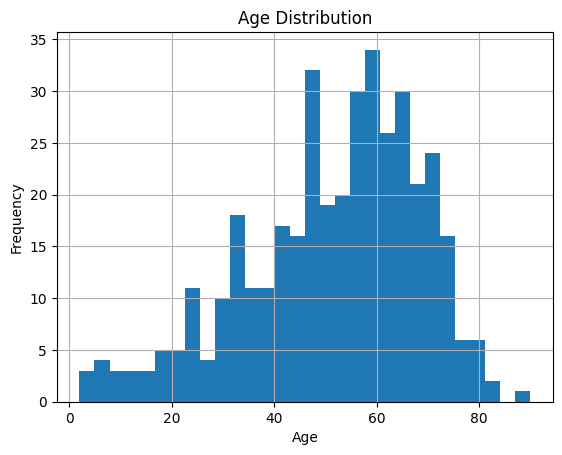

In [21]:
import matplotlib.pyplot as plt

df_kidney['age'].hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [22]:
df_kidney['age']=df_kidney['age'].fillna(df_kidney['age'].median())

In [23]:
df_kidney['age'].isnull().sum()

np.int64(0)

In [24]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Separate numeric and categorical columns
num_cols = df_kidney.select_dtypes(include=['int64','float64']).columns
cat_cols = df_kidney.select_dtypes(include=['object']).columns

# Imputer for numeric (median)
num_imputer = SimpleImputer(strategy='median')
df_kidney[num_cols] = num_imputer.fit_transform(df_kidney[num_cols])

# Imputer for categorical (mode / most_frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')
df_kidney[cat_cols] = cat_imputer.fit_transform(df_kidney[cat_cols])


print( df_kidney.isnull().values.any())


False


In [25]:
df_kidney.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [26]:
df_liver[df_liver.duplicated()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


In [27]:
df_kidney[df_kidney.duplicated()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [28]:
df_parkins[df_parkins.duplicated()]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [29]:
df_liver.drop_duplicates(inplace=True)

In [30]:
df_liver[df_liver.duplicated()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [31]:
df_liver.columns=df_liver.columns.str.strip()
df_liver.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [32]:
df_kidney.columns=df_kidney.columns.str.strip()
df_kidney.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [33]:
df_parkins.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [34]:
df_parkins.columns = df_parkins.columns.str.replace(":","_")

In [35]:
df_parkins.columns = df_parkins.columns.str.replace("(","_")
df_parkins.columns = df_parkins.columns.str.replace(")","")

In [36]:
df_parkins.columns=df_parkins.columns.str.strip()
df_parkins.columns

Index(['name', 'MDVP_Fo_Hz', 'MDVP_Fhi_Hz', 'MDVP_Flo_Hz', 'MDVP_Jitter_%',
       'MDVP_Jitter_Abs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shimmer',
       'MDVP_Shimmer_dB', 'Shimmer_APQ3', 'Shimmer_APQ5', 'MDVP_APQ',
       'Shimmer_DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [37]:
x_liver=df_liver.drop(['Dataset'],axis=1)
y_liver=df_liver['Dataset']


Checking unique values in target

In [38]:
y_liver.value_counts()

Dataset
1    406
2    164
Name: count, dtype: int64

In [39]:
x_kidney=df_kidney.drop(['classification'],axis=1)
y_kidney=df_kidney['classification']
y_kidney.value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [40]:
x_parkinsons=df_parkins.drop(['status'],axis=1)
y_parkinsons=df_parkins['status']
y_parkinsons.value_counts()

status
1    147
0     48
Name: count, dtype: int64

Removing unwanted columns

In [41]:
df_kidney = df_kidney.drop(columns=['id'],axis=1)


In [42]:
df_parkins = df_parkins.drop(columns=['name', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'Shimmer_DDA', 'MDVP_APQ'], axis=1)

In [43]:
df_parkins.columns

Index(['MDVP_Fo_Hz', 'MDVP_Fhi_Hz', 'MDVP_Flo_Hz', 'MDVP_Jitter_%',
       'MDVP_Jitter_Abs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shimmer',
       'MDVP_Shimmer_dB', 'Shimmer_APQ3', 'Shimmer_APQ5', 'NHR', 'HNR',
       'status', 'PPE'],
      dtype='object')

In [44]:
import pandas as pd

def detect_outliers_iqr(df):
    outliers = {}
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower) | (df[col] > upper)][col]
    return outliers

# Liver dataset
liver_outliers = detect_outliers_iqr(df_liver)

# Kidney dataset
kidney_outliers = detect_outliers_iqr(df_kidney)

# Parkinsons dataset
parkinsons_outliers = detect_outliers_iqr(df_parkins)

# Print summary
print("Liver outliers:", {k: len(v) for k,v in liver_outliers.items()})
print("Kidney outliers:", {k: len(v) for k,v in kidney_outliers.items()})
print("Parkinsons outliers:", {k: len(v) for k,v in parkinsons_outliers.items()})


Liver outliers: {'Age': 0, 'Total_Bilirubin': 83, 'Direct_Bilirubin': 80, 'Alkaline_Phosphotase': 69, 'Alamine_Aminotransferase': 72, 'Aspartate_Aminotransferase': 66, 'Total_Protiens': 8, 'Albumin': 0, 'Albumin_and_Globulin_Ratio': 10, 'Dataset': 0}
Kidney outliers: {'age': 10, 'bp': 36, 'sg': 7, 'al': 0, 'su': 61, 'bgr': 53, 'bu': 41, 'sc': 53, 'sod': 18, 'pot': 14, 'hemo': 2}
Parkinsons outliers: {'MDVP_Fo_Hz': 0, 'MDVP_Fhi_Hz': 11, 'MDVP_Flo_Hz': 9, 'MDVP_Jitter_%': 14, 'MDVP_Jitter_Abs': 7, 'MDVP_RAP': 14, 'MDVP_PPQ': 15, 'Jitter_DDP': 14, 'MDVP_Shimmer': 8, 'MDVP_Shimmer_dB': 10, 'Shimmer_APQ3': 6, 'Shimmer_APQ5': 13, 'NHR': 19, 'HNR': 3, 'status': 48, 'PPE': 5}


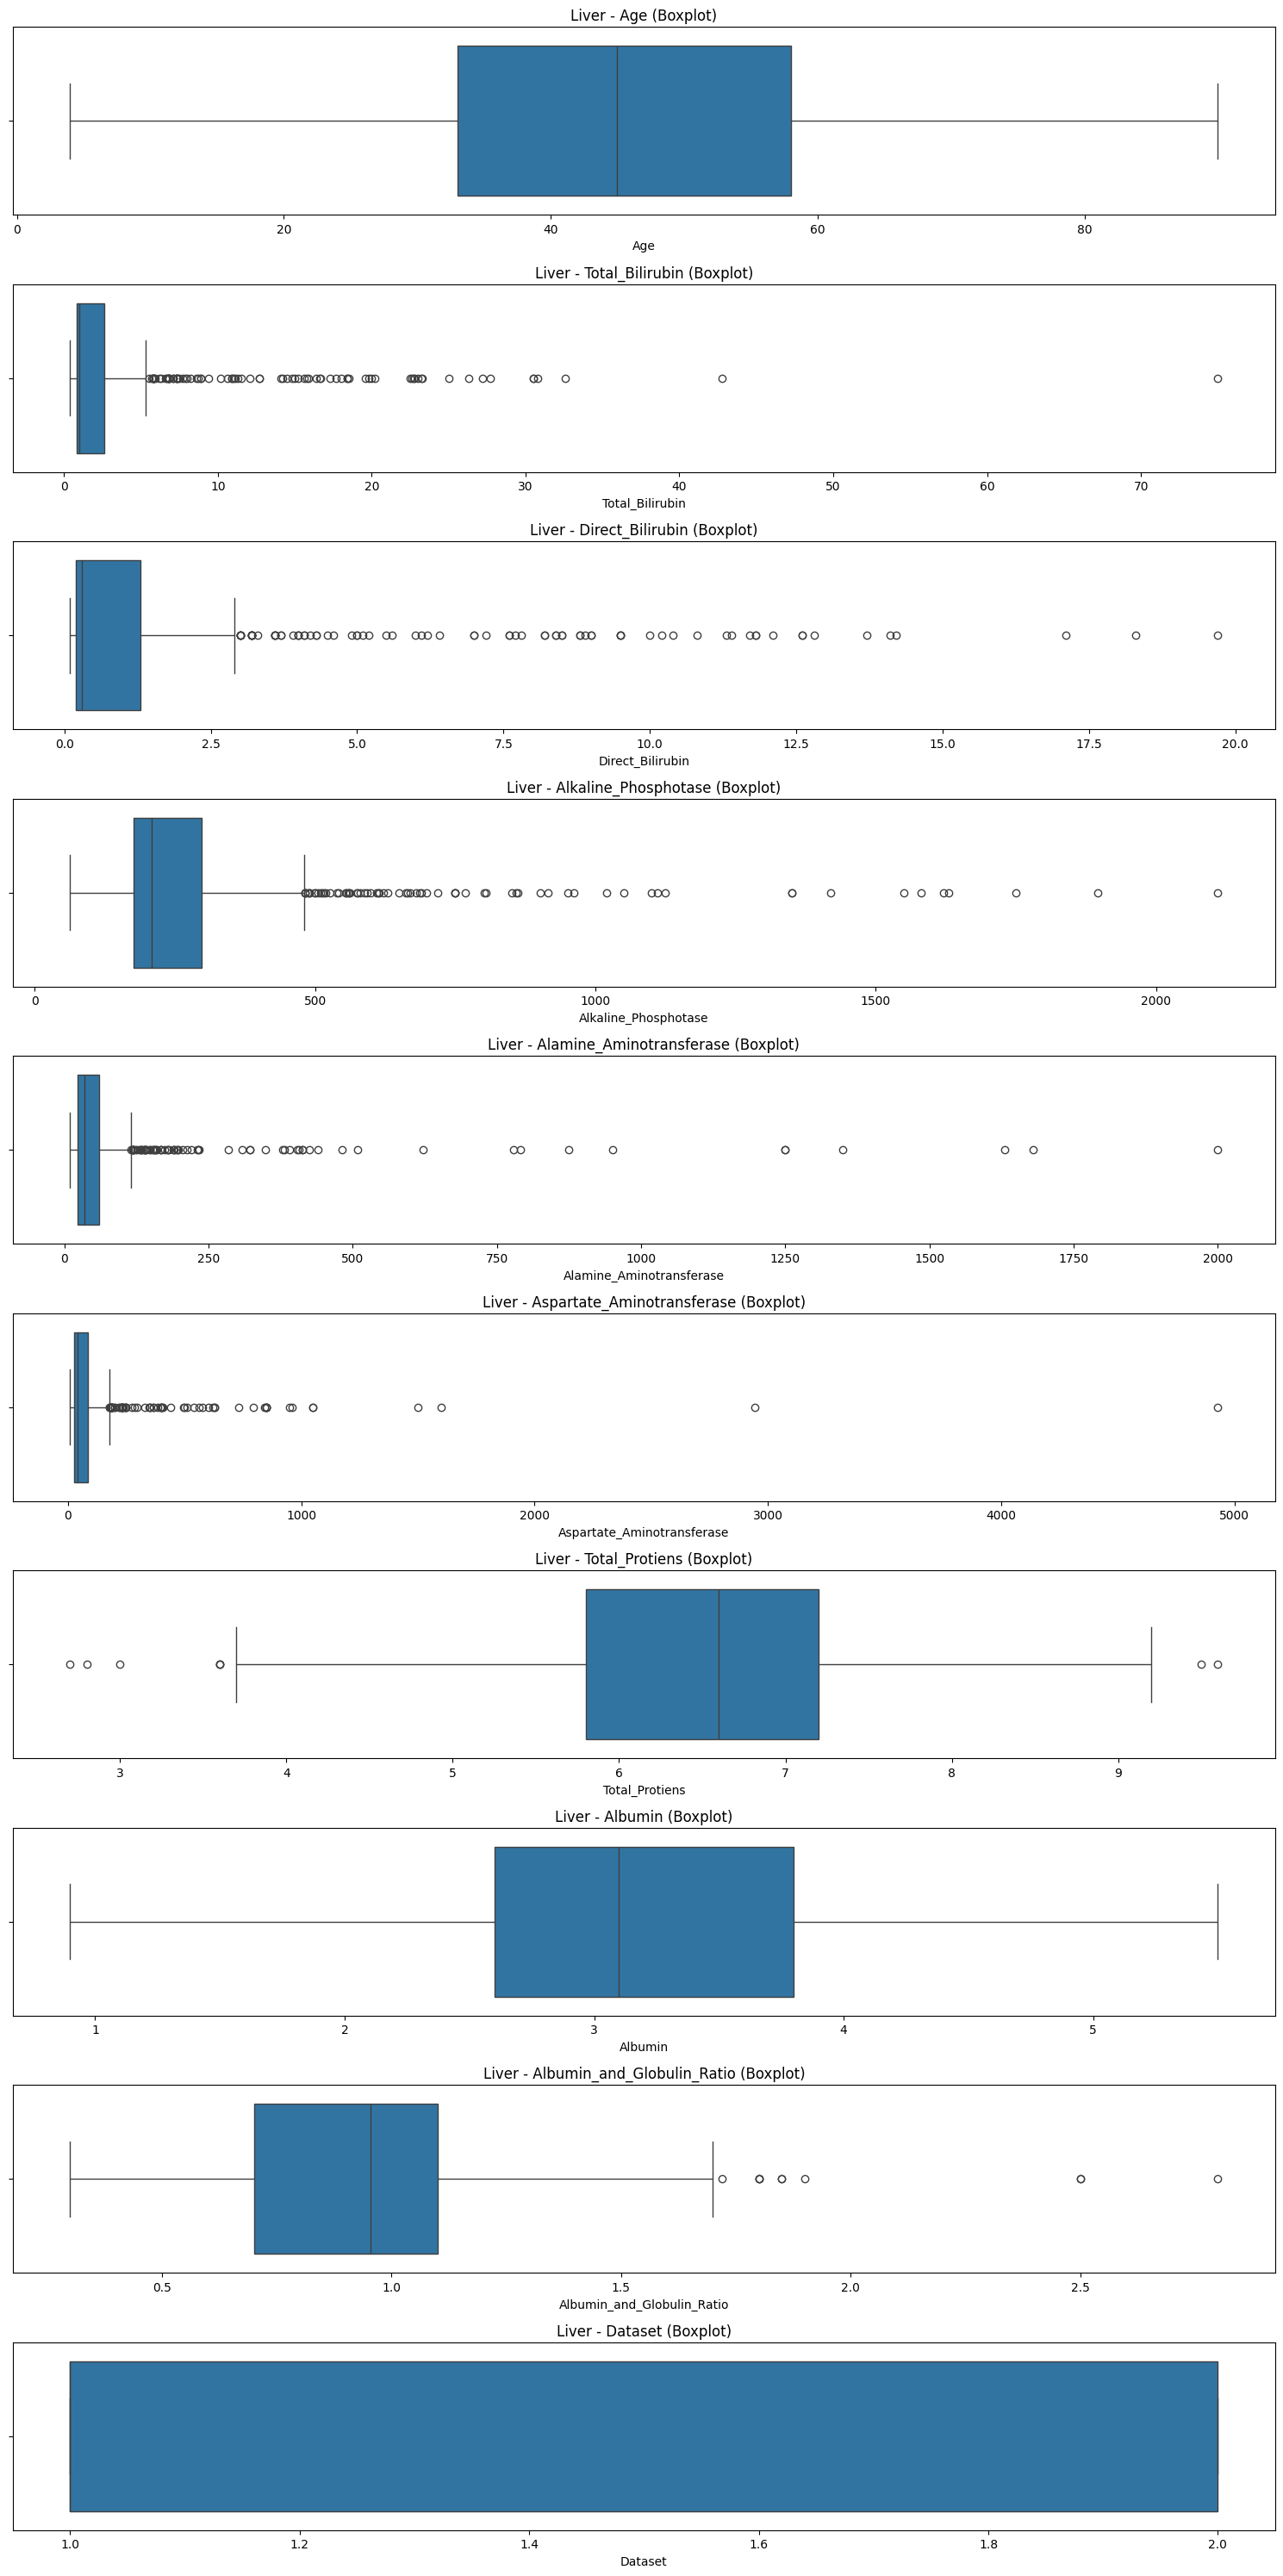

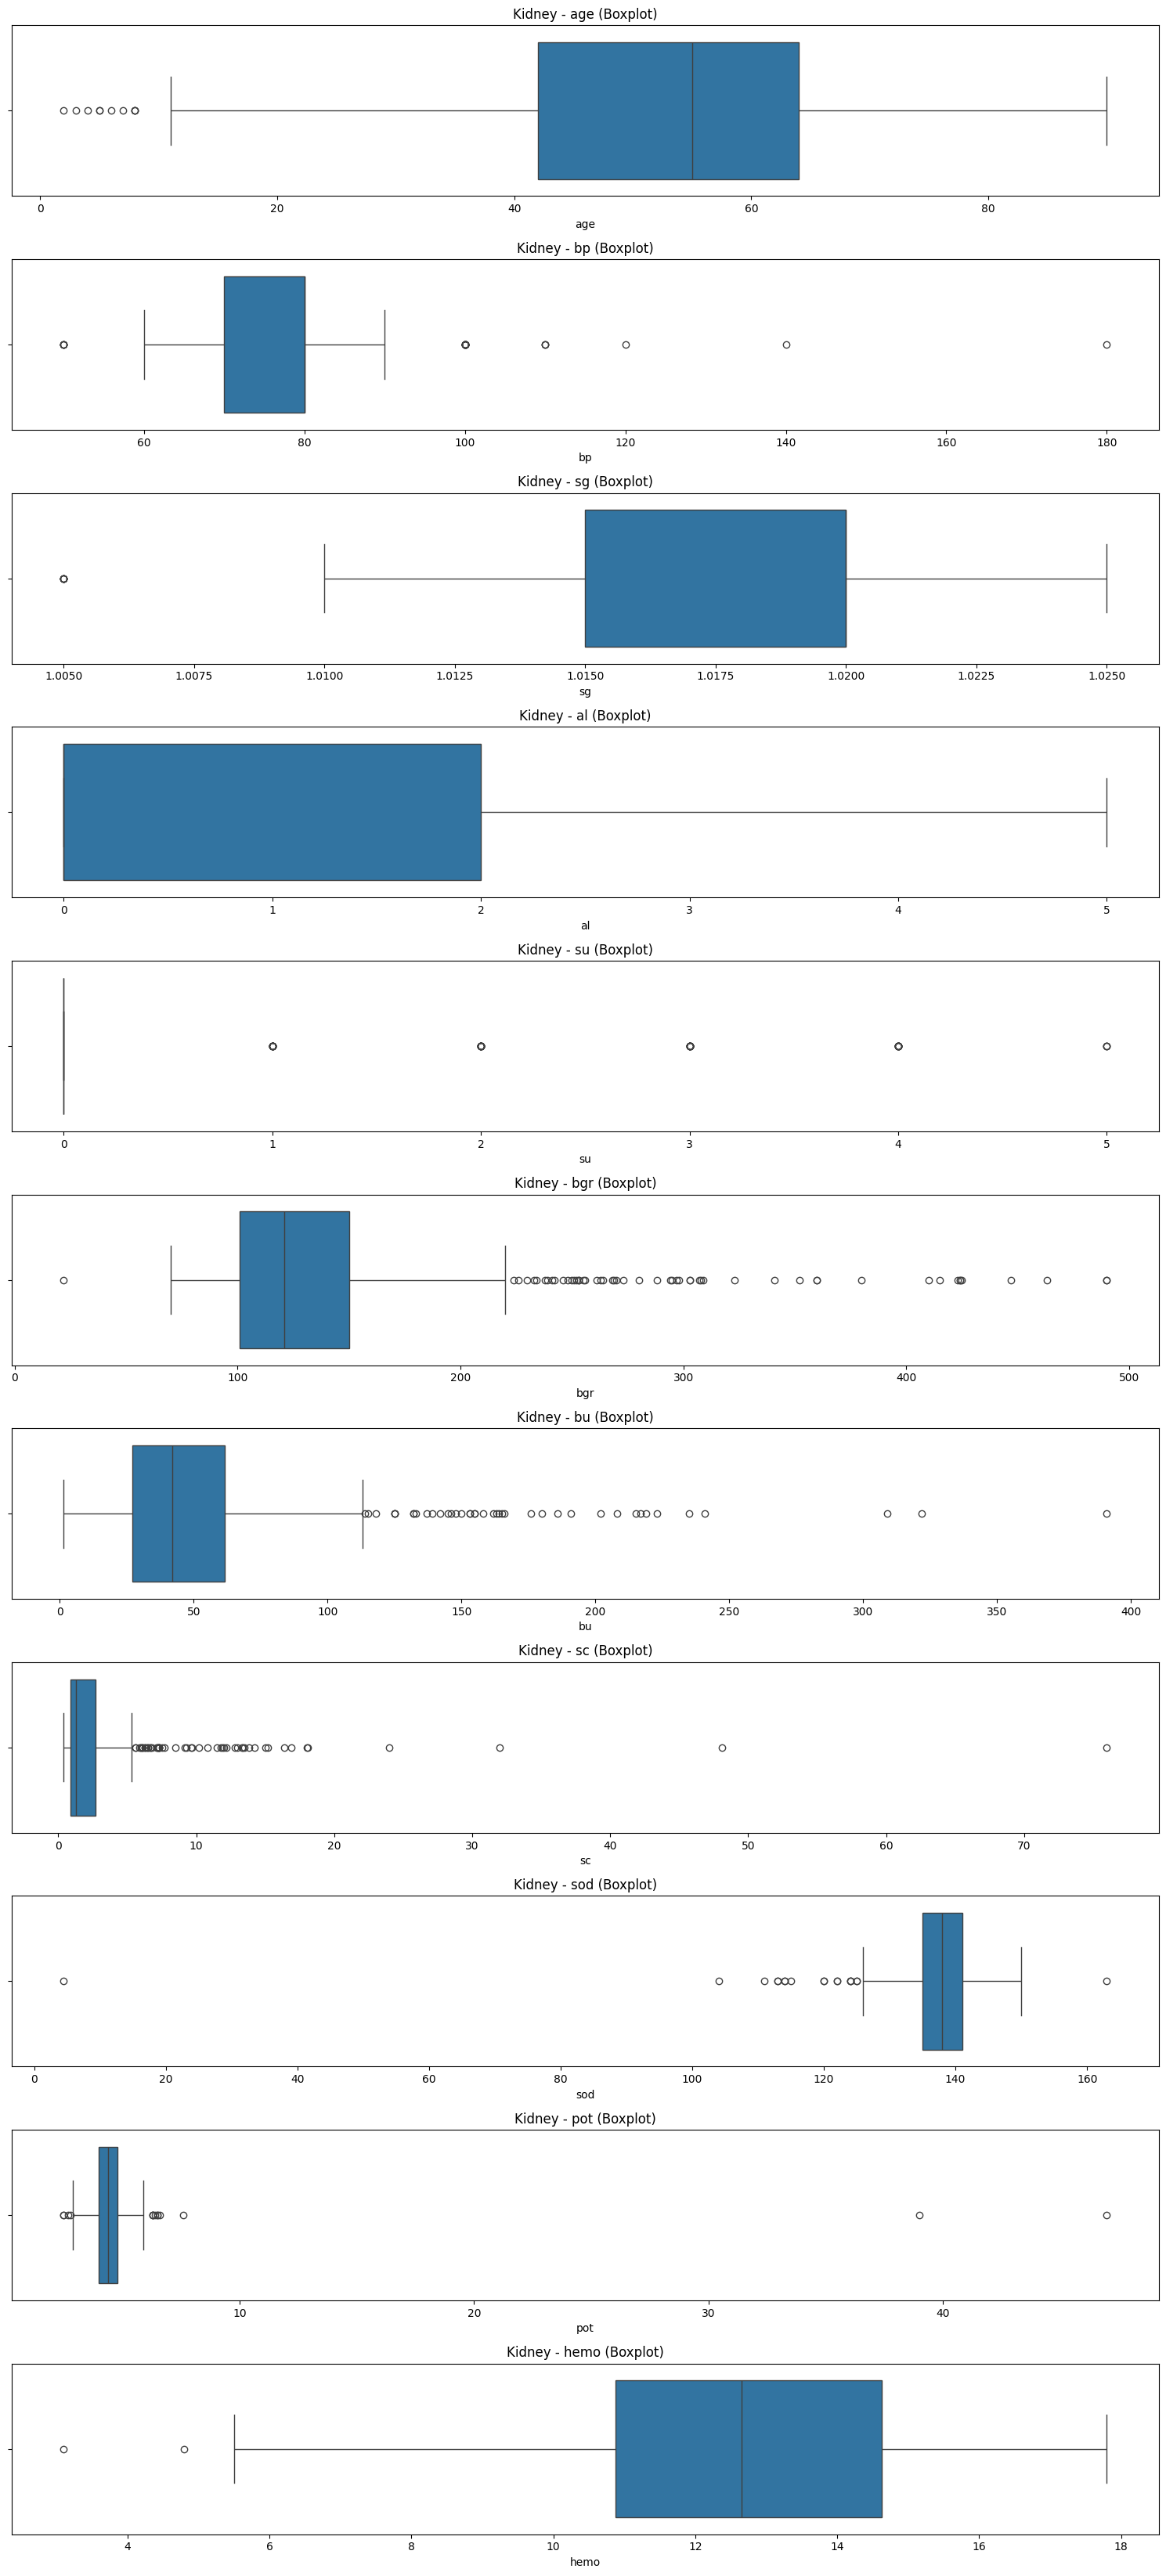

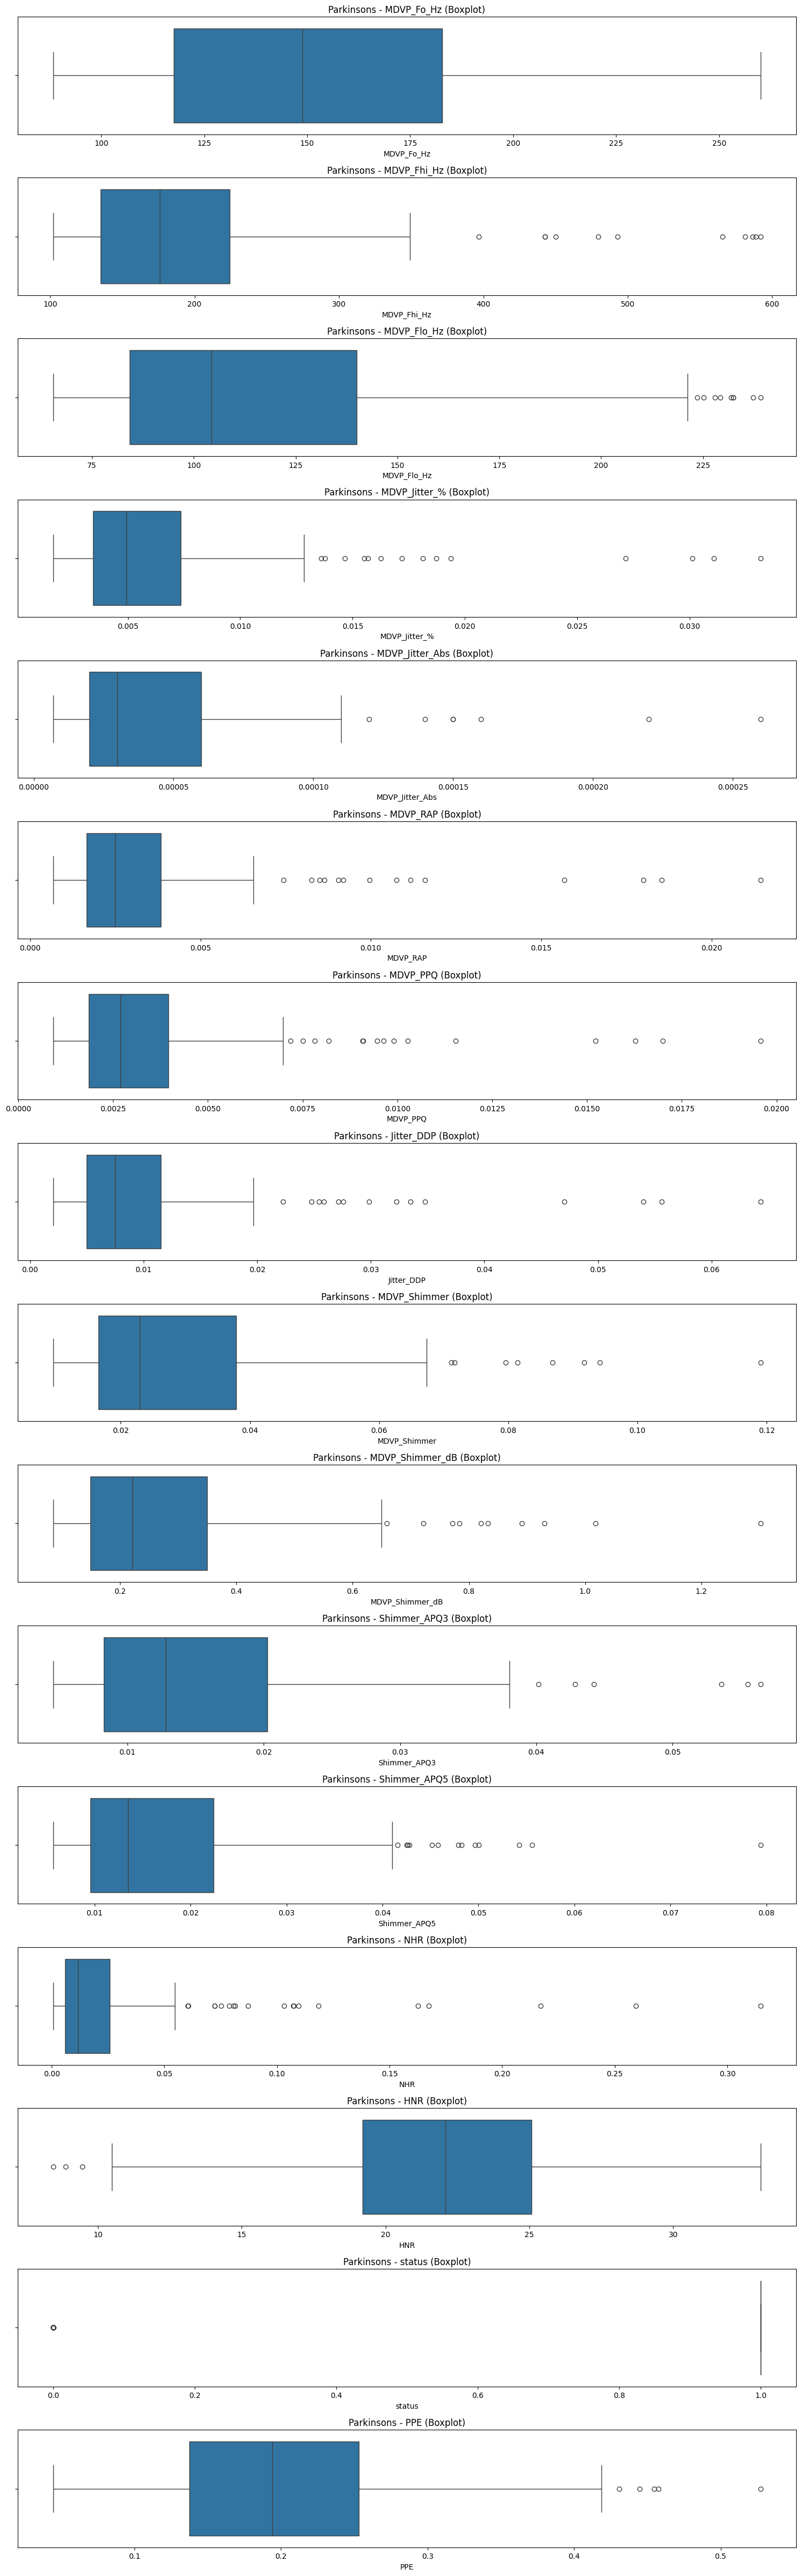

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_outliers(df, dataset_name):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    plt.figure(figsize=(15, len(numeric_cols)*3))
    
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(len(numeric_cols), 1, i)
        sns.boxplot(x=df[col])
        plt.title(f'{dataset_name} - {col} (Boxplot)')
    
    plt.tight_layout()
    plt.show()

# Liver Dataset
plot_outliers(df_liver, "Liver")

# Kidney Dataset
plot_outliers(df_kidney, "Kidney")

# Parkinsons Dataset
plot_outliers(df_parkins, "Parkinsons")


Encoding(Lable Encoding)

In [46]:
# Encoding liver
en_liv=df_liver.select_dtypes(include='object').columns
en_liv

Index(['Gender'], dtype='object')

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Gender']
encoders_liver = {}
for col in cols:
    le = LabelEncoder()
    df_liver[col] = le.fit_transform(df_liver[col])
    encoders_liver[col] = le

In [48]:
#Encoding kidney
en_kid=df_kidney.select_dtypes(include='object').columns
en_kid

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad','appet', 'pe', 'ane', 'classification']
encoders_kidney = {}
for col in cols:
    le = LabelEncoder()
    df_kidney[col] = le.fit_transform(df_kidney[col])
    encoders_kidney[col] = le

In [50]:
#Encoding parkinsons
en_park=df_parkins.select_dtypes(include='object').columns
en_park

Index([], dtype='object')

Splitting

In [53]:
# spliting liver dataset

from sklearn.model_selection import train_test_split

x_liver=df_liver.drop(['Dataset'],axis=1)
y_liver=df_liver['Dataset']

x_liver_train, x_liver_test, y_liver_train, y_liver_test = train_test_split(x_liver, y_liver, test_size=0.2, random_state=42)

y_liver_test.value_counts()

Dataset
1    85
2    29
Name: count, dtype: int64

In [ ]:
# spliting kidney dataset

from sklearn.model_selection import train_test_split

x_kidney=df_kidney.drop(['classification'],axis=1)
y_kidney=df_kidney['classification']

x_kidney_train, x_kidney_test, y_kidney_train, y_kidney_test = train_test_split(x_kidney, y_kidney, test_size=0.2, random_state=42)

y_kidney_test.value_counts()

classification
0    52
1    28
Name: count, dtype: int64

In [57]:
# spliting parkinsons dataset

from sklearn.model_selection import train_test_split

x_parkinsons=df_parkins.drop(['status'],axis=1)
y_parkinsons=df_parkins['status']

x_parkinsons_train, x_parkinsons_test, y_parkinsons_train, y_parkinsons_test = train_test_split(x_parkinsons, y_parkinsons, test_size=0.2, random_state=42)

y_parkinsons_test.value_counts()

status
1    32
0     7
Name: count, dtype: int64

Scaling

In [58]:
# liver
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_liver_train = scaler.fit_transform(x_liver_train)
x_liver_test = scaler.transform(x_liver_test)

In [59]:
# kidney
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_kidney_train = scaler.fit_transform(x_kidney_train)
x_kidney_test = scaler.transform(x_kidney_test)

In [60]:
# parkinsons
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_parkinsons_train = scaler.fit_transform(x_parkinsons_train)
x_parkinsons_test = scaler.transform(x_parkinsons_test)

Model creation

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

liver_lr_model = LogisticRegression()
liver_lr_model.fit(x_liver_train, y_liver_train)

liver_y_pred = liver_lr_model.predict(x_liver_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))